In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from keras.models import Sequential
pd.pandas.set_option('display.max_columns', None)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Final_Data_3_28.csv', parse_dates=True)
df.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,HOUR,DAY_OF_WEEK,MONTH,Zip,maxtempc,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex2,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,3/15/2018 10:50,Fairbanks,SB,14,0.47,0.40,2,9,10,5,3,21182,5,0,0,11.6,1,1,2,6:18 AM,5:11 PM,7:02 AM,6:57 PM,-3,1,4,1,12,6,64,0,1012,3,10,202,10
1,3/16/2018 14:31,Lake Shore Dr,SW,0,0.00,0.50,0,0,14,6,3,21192,1,-2,0,8.7,1,1,0,6:50 AM,6:12 PM,7:01 AM,6:58 PM,-8,-4,0,-4,15,98,52,0,1022,0,10,63,13
2,3/21/2018 0:40,Higgins,NW,0,0.00,2.47,0,0,0,4,3,4448,2,-1,0,10.3,1,1,27,9:28 AM,11:42 PM,6:52 AM,7:04 PM,-5,-6,0,-6,31,100,68,0,1014,0,10,38,23
3,3/20/2018 22:31,130th,EB,30,1.00,3.07,1,5,22,3,3,4460,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-5,-5,1,-5,33,100,66,0,1015,1,10,27,25
4,3/20/2018 4:20,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,4,3,3,4301,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-6,-8,-1,-8,37,8,68,0,1014,-1,10,46,28


In [3]:
df['TIME'] = df['TIME'].astype('datetime64[ns]')

In [4]:
df['TIME']=pd.to_datetime(df['TIME'], format = '%d%b%Y:%H:%M:%S.%f')

In [5]:
df.columns

Index(['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length',
       'BUS_COUNT', 'MESSAGE_COUNT', 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'Zip',
       'maxtempc', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex2', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [6]:
col_list = ['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length','BUS_COUNT',
            'MESSAGE_COUNT', 'Zip', 'WindGustKmph', 'visibility', 
           'windspeedKmph', 'visibility','totalSnow_cm', 'humidity','mintempC']

In [7]:
df_p = df[col_list]
df_p.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,Zip,WindGustKmph,visibility,windspeedKmph,visibility,totalSnow_cm,humidity,mintempC
0,2018-03-15 10:50:00,Fairbanks,SB,14,0.47,0.40,2,9,21182,12,10,10,10,0,64,0
1,2018-03-16 14:31:00,Lake Shore Dr,SW,0,0.00,0.50,0,0,21192,15,10,13,10,0,52,-2
2,2018-03-21 00:40:00,Higgins,NW,0,0.00,2.47,0,0,4448,31,10,23,10,0,68,-1
3,2018-03-20 22:31:00,130th,EB,30,1.00,3.07,1,5,4460,33,10,25,10,0,66,-2
4,2018-03-20 04:20:00,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,4301,37,10,28,10,0,68,-2


In [8]:
df_p.shape

(123647, 16)

In [9]:
df_p['TIME'].dt.day.unique()

array([15, 16, 21, 20, 19, 17, 18, 14], dtype=int64)

In [10]:
df_Fairbanks_SB= df_p[(df_p['STREET']=='Fairbanks') & (df_p['DIRECTION']=='SB')]
df_Fairbanks_SB.shape

(1001, 16)

In [11]:
df_Fairbanks_SB_day = df_Fairbanks_SB[df_Fairbanks_SB['TIME'].dt.day == 15]
df_Fairbanks_SB_day.shape

(143, 16)

In [12]:
df_Fairbanks_SB_T = df_Fairbanks_SB[(df_Fairbanks_SB['TIME'].dt.day == 14)|(df_Fairbanks_SB['TIME'].dt.day == 15)|(df_Fairbanks_SB['TIME'].dt.day == 16)|(df_Fairbanks_SB['TIME'].dt.day == 17)|(df_Fairbanks_SB['TIME'].dt.day == 18)|(df_Fairbanks_SB['TIME'].dt.day == 19)]
df_Fairbanks_SB_T.shape

(752, 16)

In [13]:
df_Fairbanks_SB_T = df_Fairbanks_SB_T.sort_values(by='TIME')
df_Fairbanks_SB_T.head(25)

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,Zip,WindGustKmph,visibility,windspeedKmph,visibility,totalSnow_cm,humidity,mintempC
119727,2018-03-14 13:20:00,Fairbanks,SB,20,0.67,0.4,2,3,21182,25,10,19,10,0,47,-4
25806,2018-03-14 13:30:00,Fairbanks,SB,15,0.50,0.4,3,10,21182,25,10,19,10,0,47,-4
123202,2018-03-14 13:40:00,Fairbanks,SB,14,0.47,0.4,7,33,21182,25,10,19,10,0,47,-4
104929,2018-03-14 13:50:00,Fairbanks,SB,17,0.57,0.4,1,4,21182,25,10,19,10,0,47,-4
91227,2018-03-14 14:01:00,Fairbanks,SB,14,0.47,0.4,6,28,21182,28,10,21,10,0,46,-4
115869,2018-03-14 14:10:00,Fairbanks,SB,16,0.53,0.4,3,13,21182,28,10,21,10,0,46,-4
51957,2018-03-14 14:20:00,Fairbanks,SB,21,0.70,0.4,5,24,21182,28,10,21,10,0,46,-4
87446,2018-03-14 14:31:00,Fairbanks,SB,21,0.70,0.4,3,15,21182,28,10,21,10,0,46,-4
59224,2018-03-14 14:40:00,Fairbanks,SB,16,0.53,0.4,2,16,21182,28,10,21,10,0,46,-4
117346,2018-03-14 14:50:00,Fairbanks,SB,20,0.67,0.4,2,16,21182,28,10,21,10,0,46,-4


In [14]:
col_list2 = ['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length','BUS_COUNT',
            'MESSAGE_COUNT','windspeedKmph','mintempC']
df_Fairbanks_SB_T_t = df_Fairbanks_SB_T[col_list2]
# df_Fairbanks_SB_T_t=df_Fairbanks_SB_T_t.set_index(['TIME'])
df_Fairbanks_SB_T_t.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
119727,2018-03-14 13:20:00,Fairbanks,SB,20,0.67,0.4,2,3,19,-4
25806,2018-03-14 13:30:00,Fairbanks,SB,15,0.50,0.4,3,10,19,-4
123202,2018-03-14 13:40:00,Fairbanks,SB,14,0.47,0.4,7,33,19,-4
104929,2018-03-14 13:50:00,Fairbanks,SB,17,0.57,0.4,1,4,19,-4
91227,2018-03-14 14:01:00,Fairbanks,SB,14,0.47,0.4,6,28,21,-4


In [15]:
# del df_Fairbanks_SB_T_t['TIME']
print(df_Fairbanks_SB_T_t.shape)
# df_Fairbanks_SB_T_t=df_Fairbanks_SB_T_t.set_index(['TIME'])
df_Fairbanks_SB_T_t.head()


(752, 10)


,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
119727,2018-03-14 13:20:00,Fairbanks,SB,20,0.67,0.4,2,3,19,-4
25806,2018-03-14 13:30:00,Fairbanks,SB,15,0.50,0.4,3,10,19,-4
123202,2018-03-14 13:40:00,Fairbanks,SB,14,0.47,0.4,7,33,19,-4
104929,2018-03-14 13:50:00,Fairbanks,SB,17,0.57,0.4,1,4,19,-4
91227,2018-03-14 14:01:00,Fairbanks,SB,14,0.47,0.4,6,28,21,-4


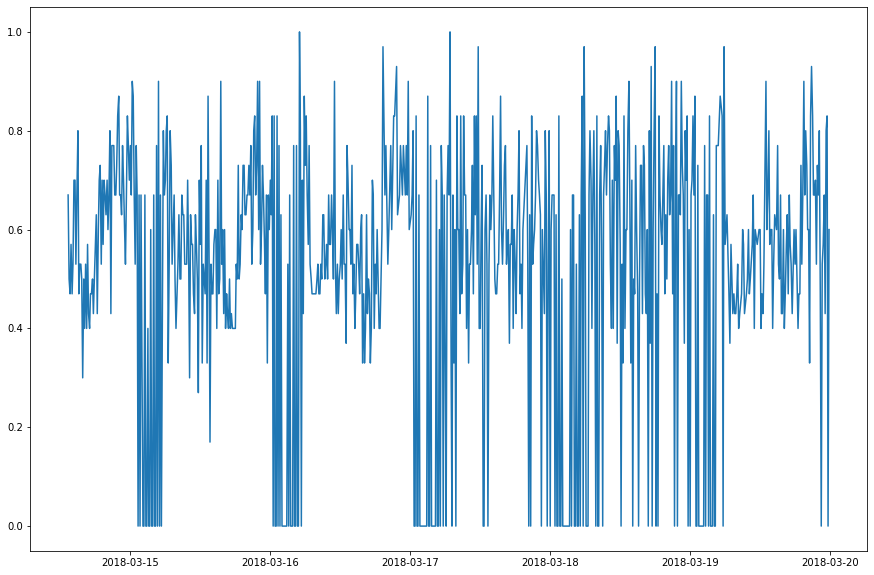

In [16]:
df_Fairbanks_SB_T_t = df_Fairbanks_SB_T_t.sort_values(by='TIME')
# df_Fairbanks_SB_T_s.head()


plt.figure(figsize = (15,10))
plt.plot(df_Fairbanks_SB_T_t['TIME'], df_Fairbanks_SB_T_t['Cong']);

In [17]:
df_Fairbanks_SB_Ts = df_Fairbanks_SB[(df_Fairbanks_SB['TIME'].dt.day == 20)|(df_Fairbanks_SB['TIME'].dt.day == 21)]
df_Fairbanks_SB_Ts.shape

(249, 16)

In [18]:
df_Fairbanks_SB_T = df_Fairbanks_SB_T.sort_values(by='TIME')
df_Fairbanks_SB_Ts.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,Zip,WindGustKmph,visibility,windspeedKmph,visibility,totalSnow_cm,humidity,mintempC
1126,2018-03-20 18:31:00,Fairbanks,SB,17,0.57,0.4,7,40,21182,42,10,33,10,0,66,-2
1221,2018-03-20 21:01:00,Fairbanks,SB,18,0.60,0.4,3,9,21182,34,10,26,10,0,65,-2
1825,2018-03-21 01:10:00,Fairbanks,SB,0,0.00,0.4,0,0,21182,30,10,22,10,0,68,-1
2315,2018-03-20 01:10:00,Fairbanks,SB,0,0.00,0.4,0,0,21182,37,10,28,10,0,66,-2
2439,2018-03-21 11:10:00,Fairbanks,SB,23,0.77,0.4,6,19,21182,28,10,23,10,0,57,-1


In [19]:
df_Fairbanks_SB_T_s = df_Fairbanks_SB_Ts[col_list2]

# del df_Fairbanks_SB_T_s['TIME']
df_Fairbanks_SB_T_s.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
1126,2018-03-20 18:31:00,Fairbanks,SB,17,0.57,0.4,7,40,33,-2
1221,2018-03-20 21:01:00,Fairbanks,SB,18,0.60,0.4,3,9,26,-2
1825,2018-03-21 01:10:00,Fairbanks,SB,0,0.00,0.4,0,0,22,-1
2315,2018-03-20 01:10:00,Fairbanks,SB,0,0.00,0.4,0,0,28,-2
2439,2018-03-21 11:10:00,Fairbanks,SB,23,0.77,0.4,6,19,23,-1


In [20]:
df_Fairbanks_SB_T_s.shape

(249, 10)

In [24]:
col=['TIME','Cong']
Test = df_Fairbanks_SB_T_s[col]
Test=Test.sort_values(by='TIME')
Test.head()

,TIME,Cong
56559,2018-03-20 00:01:00,0.83
60155,2018-03-20 00:10:00,0.67
116357,2018-03-20 00:20:00,0.80
53065,2018-03-20 00:30:00,0.80
74173,2018-03-20 00:40:00,0.33


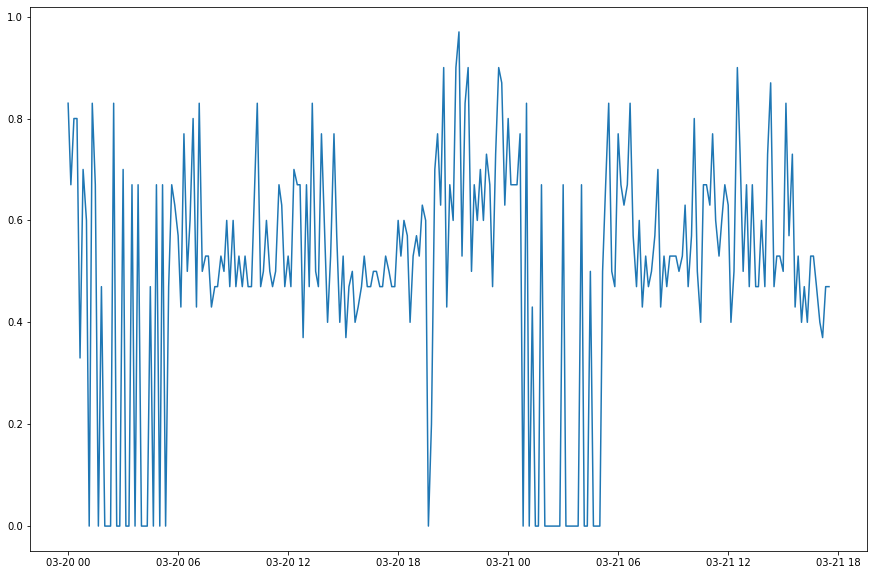

In [25]:
plt.figure(figsize = (15,10))
plt.plot(Test['TIME'], Test['Cong']);

In [26]:
col=['TIME','Cong']
Train = df_Fairbanks_SB_T_t[col]
Train=Train.sort_values(by='TIME')
Train.head()

,TIME,Cong
119727,2018-03-14 13:20:00,0.67
25806,2018-03-14 13:30:00,0.50
123202,2018-03-14 13:40:00,0.47
104929,2018-03-14 13:50:00,0.57
91227,2018-03-14 14:01:00,0.47


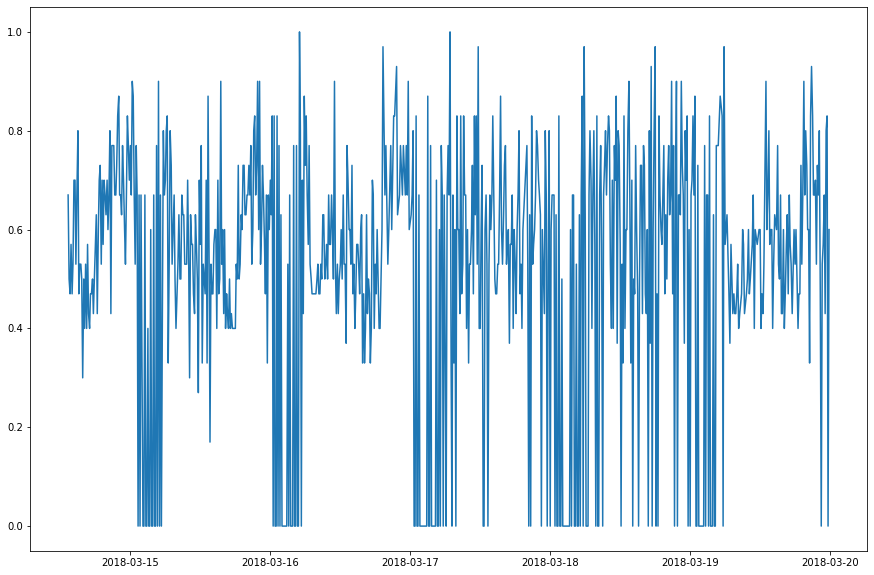

In [27]:
plt.figure(figsize = (15,10))
plt.plot(Train['TIME'], Train['Cong']);

In [ ]:
# del df_Fairbanks_SB_T_s.index
# df_Fairbanks_SB_T_s=df_Fairbanks_SB_T_s.set_index(['TIME'])
# df_Fairbanks_SB_T_s = df_Fairbanks_SB_T_s.sort_values(by='TIME')
# df_Fairbanks_SB_T_s.head()


# plt.figure(figsize = (15,10))
# plt.plot(df_Fairbanks_SB_T_s['TIME'], df_Fairbanks_SB_T_s['Cong']);

In [ ]:
# df_Fairbanks_SB_day['TIME']=pd.to_datetime(df_Fairbanks_SB_day['TIME'], format = '%H:%M:%S')

In [ ]:
# df_Fairbanks_SB_day = df_Fairbanks_SB_day.sort_index()

In [ ]:
# df_Fairbanks_SB_day = df_Fairbanks_SB_day.sort_values(by='TIME')
# df_Fairbanks_SB_day.head()

In [ ]:
# del df_Fairbanks_SB_day['index']
# df_Fairbanks_SB_day.head()

In [ ]:
# plt.figure(figsize = (15,10))
# plt.plot(df_Fairbanks_SB_day['TIME'], df_Fairbanks_SB_day['Cong']);

In [ ]:
# col_list1 = ['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length','BUS_COUNT',
#             'MESSAGE_COUNT','WindGustKmph']
# Fairbank_day = df_Fairbanks_SB_day[col_list1]

# Fairbank_day=Fairbank_day.set_index(pd.DatetimeIndex(Fairbank_day['TIME']))
# Fairbank_day['TIME']= Fairbank_day['TIME'].astype('datetime64[ns]')
# # index = pd.date_range('2018-03-15 00:01:00', '2018-03-15 23:50:00', freq='10min')

# res= Fairbank_day.groupby('STREET').resample('10min').mean().reset_index('TIME')


In [ ]:
# Fairbank_day.head()

In [ ]:
# Fairbank_day.shape

In [ ]:
# Fairbank_day.index

In [ ]:
# Fairbank_day['TIME']

In [ ]:
# idx = pd.date_range('2018-03-15 00:01:00', '2018-03-15 23:50:00', freq='10min')
# Fairbank_day.reindex(index=idx)
# Fairbank_day.head(25)

In [ ]:
# Fairbank_day.shape

In [ ]:
# plt.figure(figsize = (24,10))
# plt.plot(Fairbank_day['TIME'], Fairbank_day['Cong'])

In [ ]:
# plt.figure(figsize = (15,10))
# plt.plot(df_Fairbanks_SB_day['TIME'], df_Fairbanks_SB_day['Cong']);

In [ ]:
# plt.figure(figsize = (24,10))
# plt.plot(df_Fairbanks_SB_day.index, df_Fairbanks_SB_day['Cong'])

In [ ]:
# df_Fairbanks_SB_day['TIME']
